# Data Cleaning: Airbnb Listings

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [2]:
cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'   
]

data = pd.read_csv("listings.csv", usecols = cols)
#Question 1: why using data = pd.read_csv("listing.csv") doesn't work?

In [3]:
#Checking the first 10 rows data
data. head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$160.00,3,21,62,86.0,1
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,$105.00,1,28,22,85.0,2
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,$58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$195.00,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,$165.00,2,11,16,96.0,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$80.00,1,29,0,NaN,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$120.00,2,5,0,NaN,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,$150.00,1,30,14,96.0,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,$40.00,4,0,10,94.0,4


In [4]:
# check the number of missing values in 'zipcode' column
len(data['zipcode'][data.zipcode.isnull()])

162

In [5]:
# check the number of missing values in each individual column
for col in data.columns:
    print(col + ',Number of Missing Values: ', len(data[col][data[col].isnull()]))

id,Number of Missing Values:  0
host_id,Number of Missing Values:  0
zipcode,Number of Missing Values:  162
property_type,Number of Missing Values:  6
room_type,Number of Missing Values:  0
accommodates,Number of Missing Values:  0
bathrooms,Number of Missing Values:  463
bedrooms,Number of Missing Values:  140
beds,Number of Missing Values:  98
bed_type,Number of Missing Values:  0
price,Number of Missing Values:  0
minimum_nights,Number of Missing Values:  0
availability_30,Number of Missing Values:  0
number_of_reviews,Number of Missing Values:  0
review_scores_rating,Number of Missing Values:  8657
host_listing_count,Number of Missing Values:  0


### 1.Remove NaN values from dataframe except review_scores_rating

In [6]:
#NaN values for review_scores_rating might be an useful indicative for other information, so we'd like to keep it.

original = len(data)
data = data.dropna(how = 'any', subset = ['zipcode','property_type','bedrooms','beds','bathrooms'])
#any: if any NA values are present. drop that row 
print('Number of NaN values removed: ', original-len(data))

Number of NaN values removed:  769


### 2. Convert formatting for price from  $1.00 into a float of 1.00

In [7]:
data['price'] = (data['price'].str.replace(r'[^-+\d.]','').astype(float))

### 3. Drop any invalid values

In [8]:
print ('Number of Accomodates 0: ', len(data[data['accommodates'] == 0]))
print ('Number of Bedroom 0: ', len(data[data['bedrooms'] == 0]))
print ('Number of Beds 0: ',len(data[data['beds'] == 0]))
print ('Number of Listing with Price $0.00: ', len(data[data['price'] == 0]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

Number of Accomodates 0:  0
Number of Bedroom 0:  2321
Number of Beds 0:  0
Number of Listing with Price $0.00:  0


### 4. Convert ZipCode to 5 digits

In [9]:
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '') #\d+ one ore more \d(digits), + means one or more

In [10]:
data.head(5)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96.0,2


In [11]:
print('Number of missing review scores rating: ', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Number of missing review scores rating:  7712


### 5. Let's explore distribution of accommodates

In [12]:
print('Number of unique Accomodations: ', np.unique(data['accommodates']))

Number of unique Accomodations:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [13]:
for i in range(1,17):
    print('Accommodation {}'.format(i), len(data[data['accommodates']==i]))

Accommodation 1 2643
Accommodation 2 11400
Accommodation 3 2909
Accommodation 4 4278
Accommodation 5 982
Accommodation 6 1214
Accommodation 7 217
Accommodation 8 333
Accommodation 9 57
Accommodation 10 119
Accommodation 11 15
Accommodation 12 43
Accommodation 13 4
Accommodation 14 14
Accommodation 15 5
Accommodation 16 69


In [14]:
data.groupby('accommodates').agg('count')

,id,host_id,zipcode,property_type,room_type,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
accommodates,,,,,,,,,,,,,,,
1,2643,2643,2643,2643,2643,2643,2643,2643,2643,2643,2643,2643,2643,1501,2643
2,11400,11400,11400,11400,11400,11400,11400,11400,11400,11400,11400,11400,11400,7798,11400
3,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909,2092,2909
4,4278,4278,4278,4278,4278,4278,4278,4278,4278,4278,4278,4278,4278,3017,4278
5,982,982,982,982,982,982,982,982,982,982,982,982,982,698,982
6,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214,874,1214
7,217,217,217,217,217,217,217,217,217,217,217,217,217,155,217
8,333,333,333,333,333,333,333,333,333,333,333,333,333,221,333
9,57,57,57,57,57,57,57,57,57,57,57,57,57,44,57


In [15]:
data.groupby('accommodates').agg('count')['id']

accommodates
1      2643
2     11400
3      2909
4      4278
5       982
6      1214
7       217
8       333
9        57
10      119
11       15
12       43
13        4
14       14
15        5
16       69
Name: id, dtype: int64

### 6. Visualize distribution of price, accommodations, beds, and review_scores_rating respectively

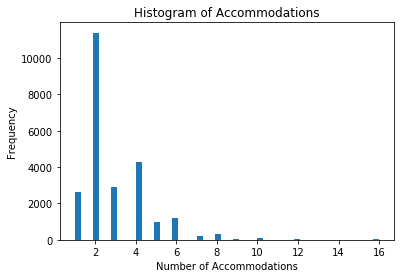

In [16]:
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()
#question: what does bin means, why we set it to 50

In [17]:
# explore distribution of beds

print('Number of Unique Beds: ', np.unique(data["beds"]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16.]


In [18]:
for i in range(1,16):
    print("Beds {}: ".format(i), len(data[data["beds"]== i ]))

Beds 1:  16002
Beds 2:  5418
Beds 3:  1770
Beds 4:  610
Beds 5:  243
Beds 6:  117
Beds 7:  41
Beds 8:  22
Beds 9:  3
Beds 10:  20
Beds 11:  4
Beds 12:  9
Beds 13:  1
Beds 14:  15
Beds 15:  0


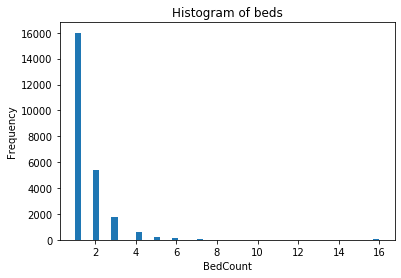

In [19]:
# Visualize the distribution of beds
plt.hist(data["beds"],bins=50)
plt.title("Histogram of beds")
plt.xlabel("BedCount")
plt.ylabel("Frequency")
plt.show()

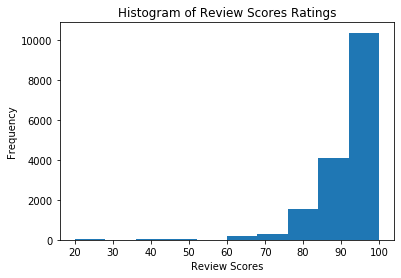

In [20]:
#visualize distribution of review scores rating

plt.hist(data["review_scores_rating"][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Scores")
plt.ylabel("Frequency")
plt.show()

### 7. Convert NaN scores with 0 reviews into "No Reviews"

In [21]:
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist() #find the location of place 
data.loc[idx_vals,'number_of_reviews'] = data['review_scores_rating'][data['number_of_reviews']==0].replace(np.nan, 'No Review')

In [22]:
data

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96.0,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.0,1,29,No Review,NaN,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0,2,5,No Review,NaN,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1,30,14,96.0,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4,0,10,94.0,4
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1,2,No Review,NaN,1


In [23]:
# remove inconsistent NaN values 
data = data[~data['review_scores_rating'].isnull()]
#in some cases review_scores_rating is not NA while number of reviews is NA, this is not reasonable, so we need to further clean data

In [24]:
len(data)

16590

In [25]:
#ensure all zipcodes are of length 5
data=data[data['zipcode'].map(len) == 5]

In [26]:
len(data)

16587

### 8. Convert review_scores_rating into different buckets

In [29]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

In [31]:
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)

In [32]:
print ('Unique Values in the Column: ', np.unique(data['review_scores_rating']))

Unique Values in the Column:  ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100']


In [33]:
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,85-89,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,95-100,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,95-100,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,95-100,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,95-100,2
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1,30,14,95-100,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4,0,10,90-94,4
12,234327,652642,10018,Apartment,Shared room,4,1.0,1.0,4.0,Real Bed,80.0,3,30,7,80-84,25
13,2000287,10303472,11213,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,110.0,1,29,26,90-94,3
14,2525956,7365834,10019,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,189.0,19,30,7,85-89,3


In [34]:
print('Number of the remaining records: ',len(data))

Number of the remaining records:  16587


### 9. Encode categorical variables

In [36]:
property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])

In [38]:
bed_dummies.head(5)

,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1


### 10. Replace the old columns with our new one-hot encoded ones

In [41]:
df = pd.concat((data.drop(['property_type','room_type','bed_type'], axis=1), \
              property_dummies.astype(int), room_dummies.astype(int), bed_dummies.astype(int)),\
              axis=1)
print('Number of Columns: ', len(df.columns))

Number of Columns:  36


### 11. Move Target predictor 'price' to the end of the dataframe

In [53]:
cols = list(df.columns.values)
idx = cols.index('price') #get the index/location of price
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]] # the outside [] is to transform that iterm to a list, so that we can do the combination
df = df[rearrange_cols]

In [54]:
df.head(5)

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,price
0,1069266,5867023,10022,2,1.0,1.0,1.0,3,21,62,...,0,1,0,0,0,0,0,0,1,160.0
2,2061725,4601412,11221,2,1.0,1.0,2.0,3,4,35,...,0,0,1,0,0,0,0,0,1,58.0
3,44974,198425,10011,2,1.0,1.0,1.0,10,1,26,...,0,1,0,0,0,0,0,0,1,185.0
4,4701675,22590025,10011,2,1.0,1.0,2.0,1,30,1,...,0,1,0,0,0,0,0,0,1,195.0
5,68914,343302,11231,6,1.0,2.0,3.0,2,11,16,...,0,1,0,0,0,0,0,0,1,165.0


### 12. Convert non-categorical variables to floats and normalize 

In [55]:
def normalize(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x:(x-mean)/std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listing_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col]=df[col].astype(float)
    df[col]=normalize(df[col])
    
#Question: When should we do the normalization, when not?

In [56]:
df.head()

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,price
0,1069266,5867023,10022,-0.550907,-0.317717,-0.407726,-0.490785,0.215485,0.337183,2.204784,...,0,1,0,0,0,0,0,0,1,160.0
2,2061725,4601412,11221,-0.550907,-0.317717,-0.407726,0.347334,0.215485,-1.067475,0.937086,...,0,0,1,0,0,0,0,0,1,58.0
3,44974,198425,10011,-0.550907,-0.317717,-0.407726,-0.490785,3.250752,-1.315356,0.514519,...,0,1,0,0,0,0,0,0,1,185.0
4,4701675,22590025,10011,-0.550907,-0.317717,-0.407726,0.347334,-0.651735,1.080826,-0.659276,...,0,1,0,0,0,0,0,0,1,195.0
5,68914,343302,11231,1.654450,-0.317717,1.362218,1.185454,-0.218125,-0.489087,0.045001,...,0,1,0,0,0,0,0,0,1,165.0


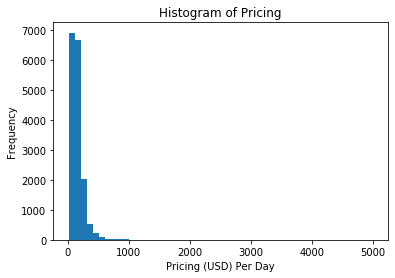

In [57]:
#visualize distribution of price(target variable)
plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

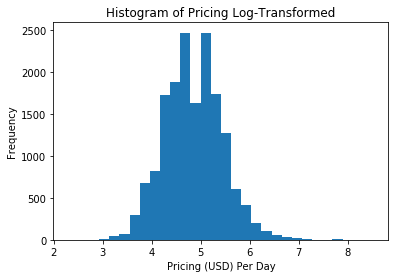

In [58]:
#log transform the response 'price' to make it become normal distribution
df['price_log'] = df['price'].apply(lambda x: math.log(x))

plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

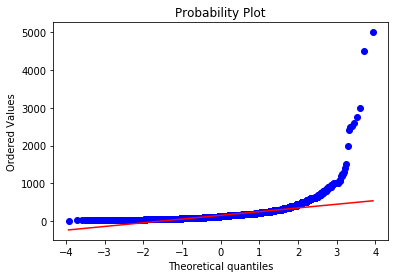

In [59]:
# qq plot for long-transformed pricing
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

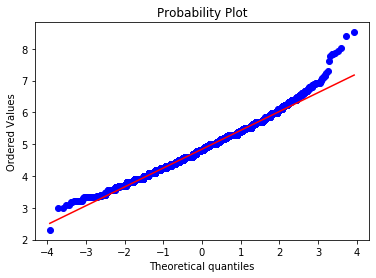

In [60]:
# qq plot for log-transformed pricing
stats.probplot(df['price_log'], dist="norm", plot=pylab)
pylab.show()

In [61]:
# write to csv
df.to_csv('processed_listing.csv')